In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.patheffects as PathEffects
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs


In [20]:
df = pd.read_csv("encoded_data.csv")
#df.drop(columns=['Tên SP'], inplace=True)
df.head()

,Kích thước,Cân nặng,Giá(đ),Nhà sản xuất,Model,Kết nối,Loại switch
0,0.719322,0.405072,3899000,3.362781e+06,1.625106e+06,1.770855e+06,1.561780e+06
1,0.719322,0.405072,2699000,3.362781e+06,1.767535e+06,1.906612e+06,1.868848e+06
2,0.652838,0.560227,6099000,3.362781e+06,1.984702e+06,1.763228e+06,1.868848e+06
3,0.652838,0.560227,5999000,3.362781e+06,2.185041e+06,1.763228e+06,2.036515e+06
4,0.652838,0.560227,5999000,3.362781e+06,1.987087e+06,1.763228e+06,1.868848e+06


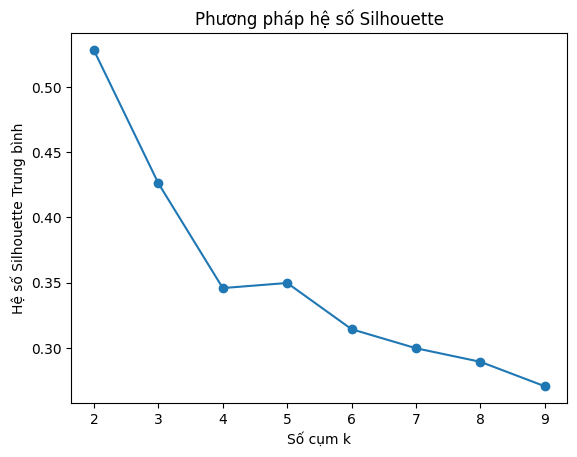

Số cụm tối ưu: 2


In [18]:


# Tính toán hệ số silhouette cho mỗi giá trị k
silhouette_avg = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=10)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg.append(silhouette_score(df, cluster_labels))

# Vẽ đồ thị hệ số silhouette trung bình
plt.plot(range(2,10), silhouette_avg, marker='o')
plt.xlabel('Số cụm k')
plt.ylabel('Hệ số Silhouette Trung bình')
plt.title('Phương pháp hệ số Silhouette')
plt.show()

# In ra số cụm tối ưu
optimal_k =range(2,10)[np.argmax(silhouette_avg)]
print(f'Số cụm tối ưu: {optimal_k}')

In [21]:
K = 2
kmeans = KMeans(K)
centroids = kmeans.fit(df)
labels = kmeans.predict(df)

In [3]:
l = []
for i in range(1,10):
    kmeans = KMeans(i)
    centroids = kmeans.fit(df)
    labels = kmeans.predict(df)
    l_iter = kmeans.inertia_
    l.append(l_iter)

In [25]:
l

[2766566945362187.0,
 1094321902785188.4,
 791169542828887.1,
 579182884150091.4,
 606010731753765.5,
 463330467690567.56,
 422768860751508.25,
 375418654393975.8,
 342179908345186.1]

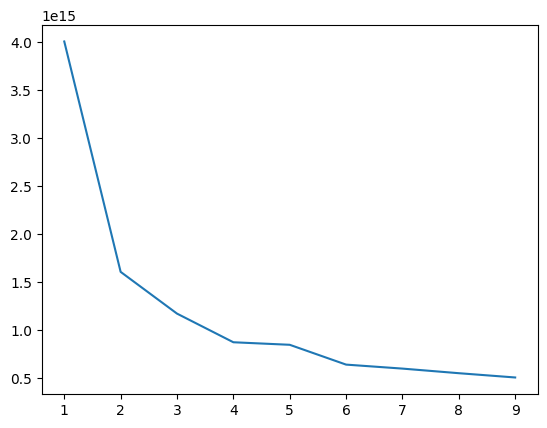

In [4]:
plt.plot(range(1,10), l)

In [22]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = labels

In [23]:
data_with_clusters.head(20)

,Kích thước,Cân nặng,Giá(đ),Nhà sản xuất,Model,Kết nối,Loại switch,Clusters
0,0.719322,0.405072,3899000,3.362781e+06,1.625106e+06,1.770855e+06,1.561780e+06,0
1,0.719322,0.405072,2699000,3.362781e+06,1.767535e+06,1.906612e+06,1.868848e+06,0
2,0.652838,0.560227,6099000,3.362781e+06,1.984702e+06,1.763228e+06,1.868848e+06,0
3,0.652838,0.560227,5999000,3.362781e+06,2.185041e+06,1.763228e+06,2.036515e+06,0
4,0.652838,0.560227,5999000,3.362781e+06,1.987087e+06,1.763228e+06,1.868848e+06,0
5,0.606987,0.181818,1599000,3.362781e+06,2.185041e+06,1.770855e+06,1.265858e+06,0
6,0.893013,0.363068,3199000,3.362781e+06,1.716767e+06,1.763228e+06,1.561780e+06,0
7,0.735902,0.346591,849000,3.362781e+06,1.625106e+06,1.763228e+06,1.868848e+06,1
8,0.775109,0.405398,1399000,1.798148e+06,1.487543e+06,1.763228e+06,2.204261e+06,1
9,0.775109,0.405398,1399000,1.798148e+06,1.491407e+06,1.763228e+06,1.732109e+06,1


In [24]:
cluster_mean_price = data_with_clusters.groupby('Clusters')['Giá(đ)'].mean()
print(cluster_mean_price)

Clusters
0    3.229266e+06
1    9.747054e+05
Name: Giá(đ), dtype: float64


In [30]:
min_value_cluster0 = np.min(data_with_clusters[data_with_clusters['Clusters'] == 0]['Giá(đ)'])
min_value_cluster0

1199000

In [31]:
max_value_cluster1 = np.max(data_with_clusters[data_with_clusters['Clusters'] == 1]['Giá(đ)'])
max_value_cluster1

2689000

In [32]:
(min_value_cluster0+max_value_cluster1)/2

1944000.0

In [25]:
for cluster, mean_price in cluster_mean_price.items():
    print(f'Cluster {cluster}: Mean Price = {mean_price:.2f}')

Cluster 0: Mean Price = 3229266.33
Cluster 1: Mean Price = 974705.41


In [26]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df)
print(tsne_results.shape)

(1368, 2)


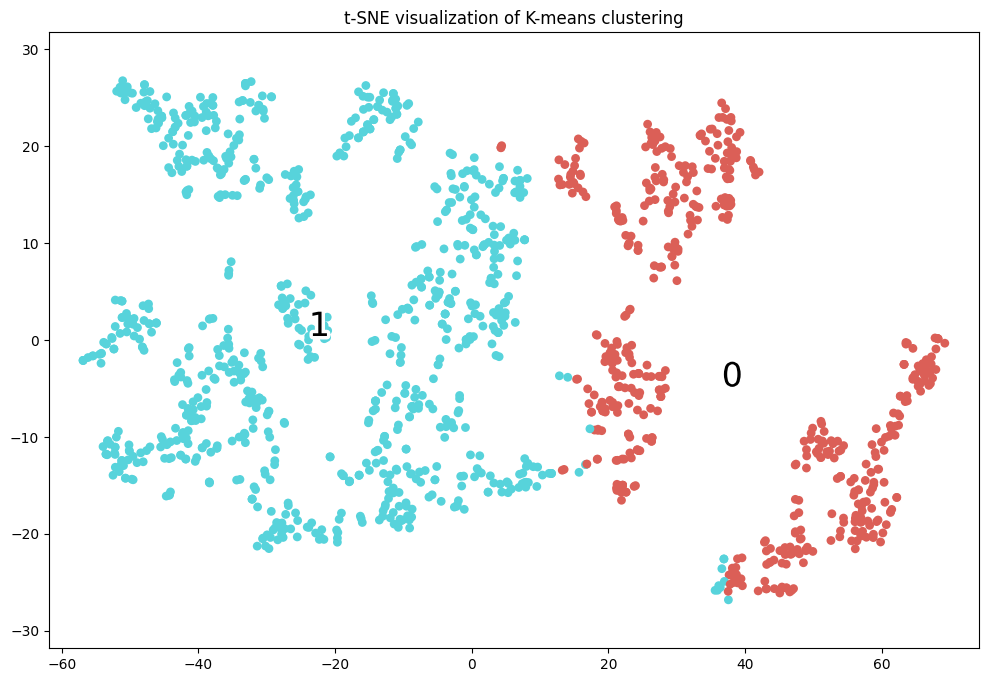

In [27]:


def _plot_kmean_scatter(df, labels):
        '''
        df: dữ liệu đầu vào sau khi giảm chiều bằng t-SNE
        labels: nhãn dự báo từ K-means
        '''
        # Lựa chọn màu sắc
        num_classes = len(np.unique(labels))
        palette = np.array(sns.color_palette("hls", num_classes))

        # Vẽ biểu đồ scatter
        fig = plt.figure(figsize=(12, 8))
        ax = plt.subplot()
        sc = ax.scatter(df[:, 0], df[:, 1], lw=0, s=40, c=palette[labels.astype(int)])
        plt.xlim(df[:, 0].min() - 5, df[:, 0].max() + 5)
        plt.ylim(df[:, 1].min() - 5, df[:, 1].max() + 5)

        # Thêm nhãn cho mỗi cluster
        txts = []

        for i in range(num_classes):
            # Vẽ text tên cụm tại trung vị của mỗi cụm
            xtext, ytext = np.median(df[labels == i, :], axis=0)
            txt = ax.text(xtext, ytext, str(i), fontsize=24)
            txt.set_path_effects([
                PathEffects.Stroke(linewidth=5, foreground="w"),
                PathEffects.Normal()
            ])
            txts.append(txt)
        plt.title('t-SNE visualization of K-means clustering')
        plt.show()

_plot_kmean_scatter(tsne_results, labels)

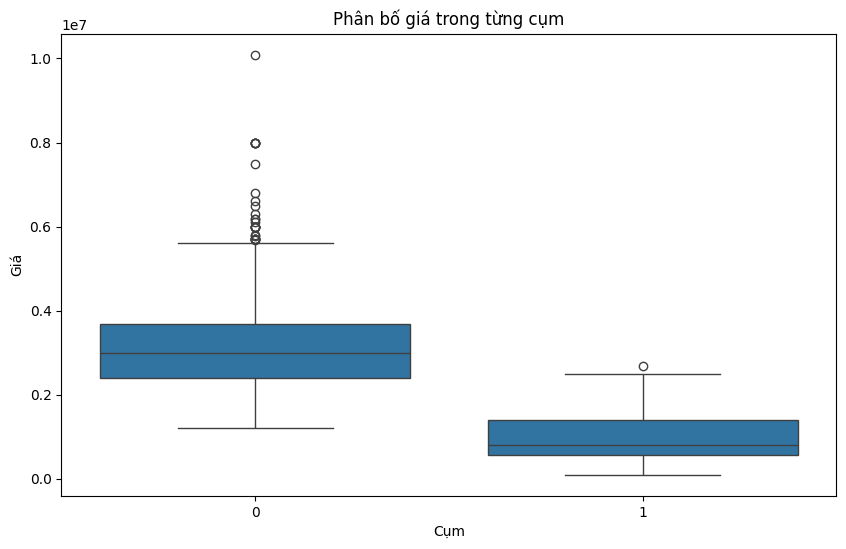

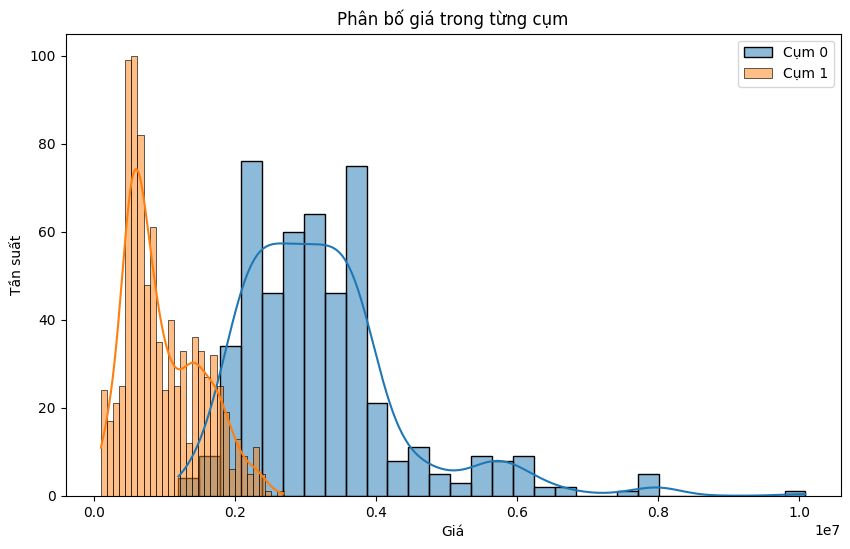

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clusters', y='Giá(đ)', data=data_with_clusters)
plt.title('Phân bố giá trong từng cụm')
plt.xlabel('Cụm')
plt.ylabel('Giá')
plt.show()

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
for i in range(4):
    sns.histplot(data_with_clusters[data_with_clusters['Clusters'] == i]['Giá(đ)'], bins=30, kde=True, label=f'Cụm {i}')
plt.title('Phân bố giá trong từng cụm')
plt.xlabel('Giá')
plt.ylabel('Tần suất')
plt.legend()
plt.show()